## Observations and Insights 

In [38]:
# OBSERVATIONS:
# 1.  Mouse G989 in the Study had unreliable data, appearing as duplications of entries with varied tumor volume
# records for the same timepoints.

# 2.Ramicane, Capomulin, Ceftasin, Naftisol and Zonfierol all have lower mortality rates than the placebo.

# 3.Ramicane and Capomulin are the two most promising drug treatments as they both have the lowest mortality rates
# and only these two drugs reduced tumor size, while the others just slowed the rate of growth.

# 3. The gender distribution of mice in the study was fairly even.

# 4.Ramicane seems to be slightly more effective at minimizing tumor volume over time than Capomulin (though with
# slightly more spread to the data) and both these drugs performed significantly better on this metric than
# Infubinol or Ceftamin.

# 5. Based on the data of mouse s185, capomulin appears to reduce tumor volume over time.

# 6. Mice treated with Capomulin have a moderate to strong positive correlation between average tumor volume and mouse weight.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single dataset
mouse_data=pd.merge(mouse_metadata, study_results, on='Mouse ID', how= 'outer')
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice in the DataFrame.
num_mice=mouse_data["Mouse ID"].nunique()
num_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_check_df=pd.DataFrame()
dup_check_df["Mouse ID"]=mouse_data["Mouse ID"]
dup_check_df["Timepoint"]=mouse_data["Timepoint"]
dup_check_df.head()
dup_check_df["Is Duplicated"]=dup_check_df.duplicated()
dup_list = dup_check_df.loc[dup_check_df["Is Duplicated"]==True]
dup_list

,Mouse ID,Timepoint,Is Duplicated
909,g989,0,True
911,g989,5,True
913,g989,10,True
915,g989,15,True
917,g989,20,True


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse=dup_list["Mouse ID"].unique()
dup_mouse
dup_data=pd.DataFrame()
dup_data= mouse_data.loc[mouse_data["Mouse ID"]==dup_mouse[0]]
dup_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#ref: https://datagy.io/pandas-drop-columns-rows/#pandas-drop-row-with-value
clean_data= mouse_data.drop(dup_data.index)
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice=clean_data["Mouse ID"].nunique()
num_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
regimen_group=clean_data.groupby(["Drug Regimen"])
reg_data1=pd.DataFrame()
reg_data1["Mean"]=regimen_group["Tumor Volume (mm3)"].mean()
reg_data1["Median"]=regimen_group["Tumor Volume (mm3)"].median()
reg_data1["Variance"]=regimen_group["Tumor Volume (mm3)"].var()
reg_data1["Standard Deviation"]=regimen_group["Tumor Volume (mm3)"].std()
reg_data1["SEM"]=regimen_group["Tumor Volume (mm3)"].sem()
reg_data1


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
regimen_group=clean_data.groupby(["Drug Regimen"])
reg_data2=pd.DataFrame()
reg_data2=regimen_group["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'], axis="rows")
reg_data2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

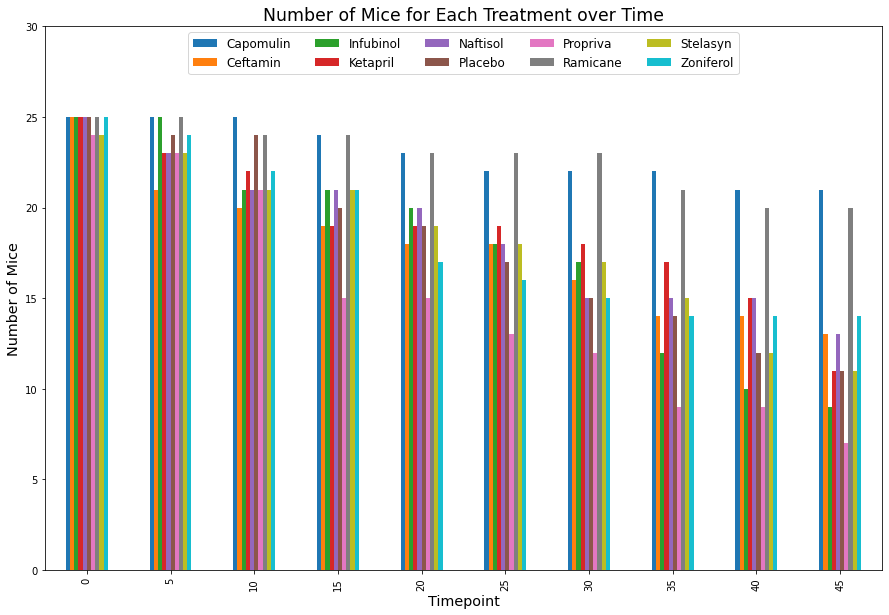

In [10]:
# Generate a bar plot showing the number of mice per time point 
#for each treatment throughout the course of the study using pandas.

df=clean_data.groupby(["Timepoint","Drug Regimen"])
df2= df["Mouse ID"].count()

#separate out the Drug Regimen into a Column Header/ Group
df3=df2.unstack(1)

#plot & label
fig=df3.plot(kind="bar", figsize=(15,10))
fig.set_title("Number of Mice for Each Treatment over Time", fontsize="xx-large")
fig.set_xlabel("Timepoint", fontsize="x-large")
fig.set_ylabel("Number of Mice", fontsize="x-large")
fig.set_ylim(0,30)
fig.legend(loc=9, ncol=5, fontsize="large")




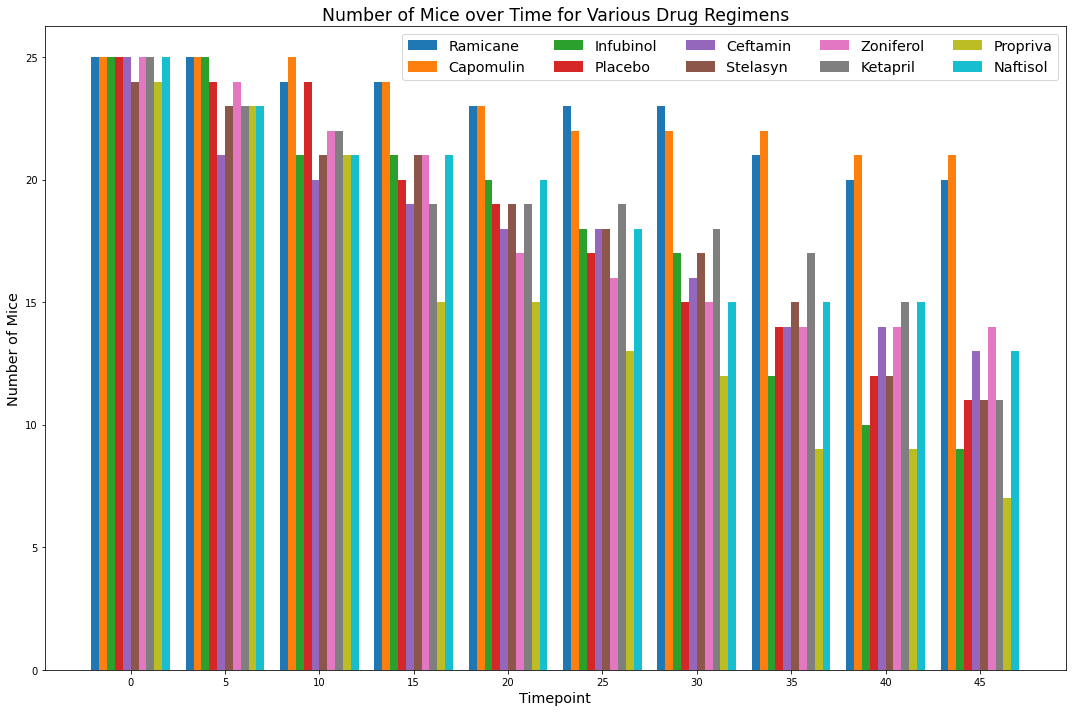

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the 
# study using pyplot.

timepoints = list(clean_data["Timepoint"].unique())

x=3*np.arange(len(timepoints))
x_axis=x


tick_locations= [value for value in x_axis]
width=.25

group_list=list(clean_data["Drug Regimen"].unique())

df4=clean_data.groupby(["Timepoint", "Drug Regimen"],as_index=False)["Mouse ID"].count()
df4=df4.rename(columns={"Mouse ID": "Mouse Count"})

Ramicane=df4.loc[df4["Drug Regimen"]==group_list[0]]
Capomulin=df4.loc[df4["Drug Regimen"]==group_list[1]]
Infubinol=df4.loc[df4["Drug Regimen"]==group_list[2]]
Placebo=df4.loc[df4["Drug Regimen"]==group_list[3]]
Ceftamin=df4.loc[df4["Drug Regimen"]==group_list[4]]
Stelasyn=df4.loc[df4["Drug Regimen"]==group_list[5]]
Zoniferol=df4.loc[df4["Drug Regimen"]==group_list[6]]
Ketapril=df4.loc[df4["Drug Regimen"]==group_list[7]]
Propriva=df4.loc[df4["Drug Regimen"]==group_list[8]]
Naftisol=df4.loc[df4["Drug Regimen"]==group_list[9]]


# Ref: https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
fig, ax = plt.subplots(figsize=(15,10))

rects1=ax.bar(x - 4.5*width, Ramicane["Mouse Count"], width, label="Ramicane")
rects2=ax.bar(x - 3.5*width, Capomulin["Mouse Count"], width, label="Capomulin")
rects3=ax.bar(x - 2.5*width, Infubinol["Mouse Count"], width, label="Infubinol")
rects4=ax.bar(x - 1.5*width, Placebo["Mouse Count"], width, label="Placebo")
rects5=ax.bar(x - .5*width, Ceftamin["Mouse Count"], width, label="Ceftamin")
rects6=ax.bar(x + .5* width, Stelasyn["Mouse Count"], width, label="Stelasyn")
rects7=ax.bar(x + 1.5*width, Zoniferol["Mouse Count"], width, label="Zoniferol")
rects8=ax.bar(x + 2.5*width, Ketapril["Mouse Count"], width, label="Ketapril")
rects9=ax.bar(x + 3.5*width, Propriva["Mouse Count"], width, label="Propriva")
rects10=ax.bar(x + 4.5*width, Naftisol["Mouse Count"], width, label="Naftisol")

# create title and legend, label axes
ax.set_ylabel('Number of Mice', fontsize="x-large")
ax.set_xlabel('Timepoint', fontsize="x-large")
ax.set_title('Number of Mice over Time for Various Drug Regimens', fontsize="xx-large")
ax.set_xticks(x)
ax.set_xticklabels(timepoints)
ax.legend(ncol=5, fontsize="x-large")

fig.tight_layout()
plt.show()


## Pie Plots

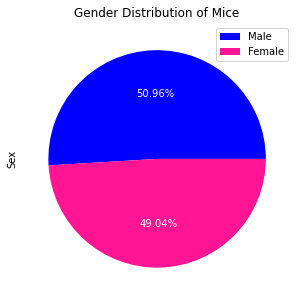

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
d=clean_data["Sex"].value_counts()
d.plot.pie(y="Gender", figsize=(5,5),autopct = "%.2f%%", colors=["blue", "DeepPink"],title="Gender Distribution of Mice", textprops=dict(color="w"), legend= ["Male", "Female"])
plt.show()
plt.tight_layout()



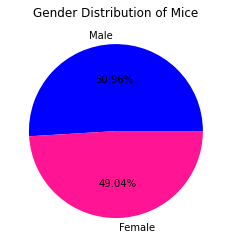

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig=plt.pie(d, explode=None, labels=["Male", "Female"], colors=["Blue", "DeepPink"],autopct = "%.2f%%")
plt.axis='equal'
plt.title('Gender Distribution of Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
#INSTRUCTIONS

# Calculate the final tumor volume of EACH MOUSE across four of the most promising treatment regimens.
# (These were specified in the README to be Capomulin, Ramicane, Infubinol, and Ceftamin.
# I disagree with the decision of the top four because Infubinol has a higher mortality rate than the placebo,
# however I will do as the readme requests for my analysis.)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [15]:
# get the last tumor volume for all mice (whenever the mouse did not just at the last timepoint)
df_last=list(clean_data[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]].groupby(["Drug Regimen","Mouse ID"])["Timepoint"].idxmax().values)
df_last
    


[309,
 299,
 64,
 244,
 360,
 440,
 204,
 337,
 317,
 380,
 282,
 39,
 144,
 1455,
 134,
 390,
 19,
 370,
 164,
 104,
 350,
 340,
 224,
 29,
 124,
 493,
 594,
 600,
 617,
 840,
 940,
 993,
 1033,
 1112,
 1119,
 1122,
 1132,
 1162,
 1260,
 1379,
 1406,
 1551,
 1582,
 1583,
 1670,
 1743,
 1773,
 1797,
 1845,
 1855,
 463,
 473,
 530,
 540,
 637,
 669,
 742,
 800,
 834,
 949,
 1053,
 1076,
 1205,
 1225,
 1312,
 1314,
 1397,
 1485,
 1616,
 1632,
 1640,
 1683,
 1726,
 1813,
 1872,
 513,
 696,
 725,
 735,
 764,
 824,
 851,
 864,
 884,
 930,
 938,
 1043,
 1102,
 1193,
 1203,
 1246,
 1277,
 1334,
 1354,
 1390,
 1593,
 1605,
 1627,
 1703,
 1823,
 567,
 610,
 774,
 790,
 810,
 856,
 1013,
 1142,
 1152,
 1169,
 1215,
 1294,
 1465,
 1475,
 1571,
 1599,
 1614,
 1645,
 1752,
 1753,
 1803,
 1835,
 1857,
 1882,
 1892,
 483,
 577,
 657,
 706,
 716,
 784,
 952,
 968,
 983,
 1163,
 1237,
 1267,
 1304,
 1424,
 1444,
 1479,
 1498,
 1501,
 1561,
 1576,
 1619,
 1648,
 1678,
 1787,
 1833,
 550,
 751,
 893,
 90

In [16]:
# filter the clean_data dataframe into a new dataframe that only contains the data for the last timepoint of each mouse.
# First copy the clean_data dataframe into a new dataframs
to_filter_df=clean_data
# create a new column with Boolean values to adjust and filter on later
to_filter_df["is_last_timepoint"]=(False)
# loop through the indices of the last timepoint values for each mouse, established prior, and rename their Booleans to True
for rowidx in df_last:
    to_filter_df.at[rowidx, ["is_last_timepoint"]]=True
to_filter_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_last_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [17]:
#create a new filtered dataframe for only the rows with a True Boolean value in the filtering column. 
last_time_df=to_filter_df.loc[to_filter_df["is_last_timepoint"]==True]
last_time_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_last_timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,True
19,s185,Capomulin,Female,3,17,45,23.343598,1,True
29,x401,Capomulin,Female,16,15,45,28.484033,0,True
39,m601,Capomulin,Male,22,17,45,28.430964,1,True
49,g791,Ramicane,Male,11,16,45,29.128472,1,True


In [18]:
#first we will look at Ramicane:
# get final tumor data set"
ramicane_final=last_time_df.loc[last_time_df["Drug Regimen"]=="Ramicane"]
ramicane_final_tumor=ramicane_final[["Mouse ID","Tumor Volume (mm3)"]]
ramicane_final_tumor.head()

,Mouse ID,Tumor Volume (mm3)
9,k403,22.050126
49,g791,29.128472
59,s508,30.276232
74,m546,30.564625
84,z578,30.638696


In [19]:
#create quartiles
ramicane_quartiles= ramicane_final_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ramicane_upperq= ramicane_quartiles[.75]
ramicane_lowerq= ramicane_quartiles[.25]

#determine iqr
ramicane_iqr=ramicane_upperq - ramicane_lowerq

#create bounds:
ramicane_lbound= ramicane_lowerq-(1.5*ramicane_iqr)
ramicane_ubound= ramicane_upperq+(1.5*ramicane_iqr)
print(f'ramicane lower bound: {ramicane_lbound}, ramicane upper bound: {ramicane_ubound}')


ramicane lower bound: 17.912664470000003, ramicane upper bound: 54.30681135


In [20]:
#create outliar conditions
ramicane_outliar_condition=(ramicane_final_tumor["Tumor Volume (mm3)"]<ramicane_lbound)|(ramicane_final_tumor["Tumor Volume (mm3)"]>ramicane_ubound)

#check for outliars
ramicane_outliars=ramicane_final_tumor.loc[ramicane_outliar_condition]
ramicane_outliars

# this shows there are no outliars for the ramicane data

,Mouse ID,Tumor Volume (mm3)


In [21]:
# Repeat for Capomulin
# get final tumor data set"
Capomulin_final=last_time_df.loc[last_time_df["Drug Regimen"]=="Capomulin"]
Capomulin_final_tumor=Capomulin_final[["Mouse ID","Tumor Volume (mm3)"]]
Capomulin_final_tumor.head()

,Mouse ID,Tumor Volume (mm3)
19,s185,23.343598
29,x401,28.484033
39,m601,28.430964
64,f966,30.485985
104,u364,31.023923


In [22]:
#create quartiles
Capomulin_quartiles= Capomulin_final_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Capomulin_upperq= Capomulin_quartiles[.75]
Capomulin_lowerq= Capomulin_quartiles[.25]

#determine iqr
Capomulin_iqr=Capomulin_upperq - Capomulin_lowerq

#create bounds:
Capomulin_lbound= Capomulin_lowerq-(1.5*Capomulin_iqr)
Capomulin_ubound= Capomulin_upperq+(1.5*Capomulin_iqr)


print(f'Capomulin lower bound: {Capomulin_lbound}, Capomulin upper bound: {Capomulin_ubound}')

Capomulin lower bound: 20.70456164999999, Capomulin upper bound: 51.83201549


In [23]:
#create outliar conditions
Capomulin_outliar_condition=(Capomulin_final_tumor["Tumor Volume (mm3)"]<Capomulin_lbound)|(Capomulin_final_tumor["Tumor Volume (mm3)"]>Capomulin_ubound)

#check for outliars
Capomulin_outliars=Capomulin_final_tumor.loc[Capomulin_outliar_condition]
Capomulin_outliars
# No outliars for capomulin data

,Mouse ID,Tumor Volume (mm3)


In [24]:
#Repeat for Infubinol:
# get final tumor data set"
Infubinol_final=last_time_df.loc[last_time_df["Drug Regimen"]=="Infubinol"]
Infubinol_final_tumor=Infubinol_final[["Mouse ID","Tumor Volume (mm3)"]]

Infubinol_final_tumor.head()


,Mouse ID,Tumor Volume (mm3)
463,a203,67.973419
473,a251,65.525743
530,a577,57.031862
540,a685,66.083066
637,c139,72.226731


In [26]:
#create quartiles
Infubinol_quartiles= Infubinol_final_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Infubinol_upperq= Infubinol_quartiles[.75]
Infubinol_lowerq= Infubinol_quartiles[.25]

#determine iqr
Infubinol_iqr=Infubinol_upperq - Infubinol_lowerq

#create bounds:
Infubinol_lbound= Infubinol_lowerq-(1.5*Infubinol_iqr)
Infubinol_ubound= Infubinol_upperq+(1.5*Infubinol_iqr)

print(f'Upper Bound: {Infubinol_ubound}, Lower Bound: {Infubinol_lbound}')

Upper Bound: 82.74144559000001, Lower Bound: 36.83290494999999


In [27]:
#create outliar conditions
Infubinol_outliar_condition=(Infubinol_final_tumor["Tumor Volume (mm3)"]<Infubinol_lbound)|(Infubinol_final_tumor["Tumor Volume (mm3)"]>Infubinol_ubound)

#check for outliars
Infubinol_outliars=Infubinol_final_tumor.loc[Infubinol_outliar_condition]
Infubinol_outliars

# one outliar for infubinol

,Mouse ID,Tumor Volume (mm3)
669,c326,36.321346


In [29]:
# Repeat for Ceftamin
# get final tumor data set"
Ceftamin_final=last_time_df.loc[last_time_df["Drug Regimen"]=="Ceftamin"]
Ceftamin_final_tumor=Ceftamin_final[["Mouse ID","Tumor Volume (mm3)"]]

Ceftamin_final_tumor.head()

,Mouse ID,Tumor Volume (mm3)
493,a275,62.999356
594,b447,45.000000
600,b487,56.057749
617,b759,55.742829
840,f436,48.722078


In [30]:
#create quartiles
Ceftamin_quartiles= Ceftamin_final_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ceftamin_upperq= Ceftamin_quartiles[.75]
Ceftamin_lowerq= Ceftamin_quartiles[.25]

#determine iqr
Ceftamin_iqr=Ceftamin_upperq - Ceftamin_lowerq

#create bounds:
Ceftamin_lbound= Ceftamin_lowerq-(1.5*Ceftamin_iqr)
Ceftamin_ubound= Ceftamin_upperq+(1.5*Ceftamin_iqr)

print(f' Upper Bound: {Ceftamin_ubound}, Lower Bound: {Ceftamin_lbound}')

 Upper Bound: 87.66645829999999, Lower Bound: 25.355449580000002


In [31]:
#create outliar conditions
Ceftamin_outliar_condition=(Ceftamin_final_tumor["Tumor Volume (mm3)"]<Ceftamin_lbound)|(Ceftamin_final_tumor["Tumor Volume (mm3)"]>Ceftamin_ubound)

#check for outliars
Ceftamin_outliars=Ceftamin_final_tumor.loc[Ceftamin_outliar_condition]
Ceftamin_outliars
# no outliars for ceftamin

,Mouse ID,Tumor Volume (mm3)


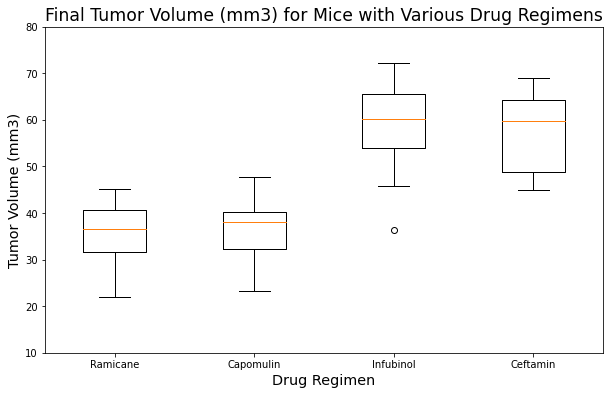

<Figure size 432x288 with 0 Axes>

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot([ramicane_final_tumor["Tumor Volume (mm3)"],Capomulin_final_tumor["Tumor Volume (mm3)"],\
             Infubinol_final_tumor["Tumor Volume (mm3)"], Ceftamin_final_tumor["Tumor Volume (mm3)"]],\
           labels=["Ramicane", "Capomulin", "Infubinol", "Ceftamin"])
ax.set_ylabel("Tumor Volume (mm3)", fontsize="x-large")
ax.set_xlabel("Drug Regimen", fontsize="x-large")
ax.set_ylim(10,80)   
ax.set_title("Final Tumor Volume (mm3) for Mice with Various Drug Regimens", fontsize="xx-large")
  

plt.show()
plt.tight_layout()



## Line and Scatter Plots

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_all=clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
Capomulin_all_tumor=Capomulin_all[["Mouse ID","Tumor Volume (mm3)"]]
Capomulin_all
# pick one mouse = s185
Capomulin_s185mouse=Capomulin_all.loc[Capomulin_all["Mouse ID"]=="s185"]
Capomulin_s185mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_last_timepoint
10,s185,Capomulin,Female,3,17,0,45.000000,0,False
11,s185,Capomulin,Female,3,17,5,43.878496,0,False
12,s185,Capomulin,Female,3,17,10,37.614948,0,False
13,s185,Capomulin,Female,3,17,15,38.177232,0,False
14,s185,Capomulin,Female,3,17,20,36.866876,0,False


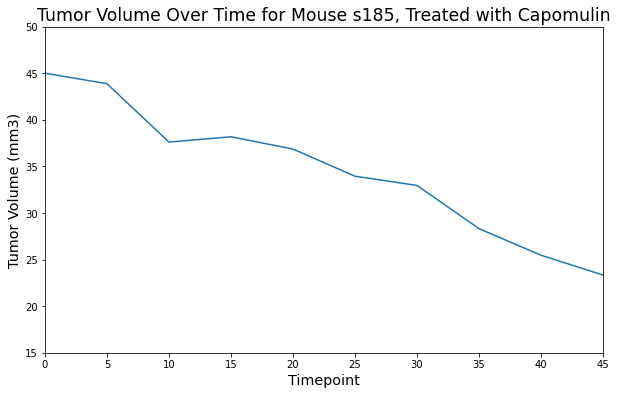

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(10,6))
plt.plot(Capomulin_s185mouse["Timepoint"], Capomulin_s185mouse["Tumor Volume (mm3)"])
plt.ylabel('Tumor Volume (mm3)', fontsize="x-large")
plt.xlabel('Timepoint', fontsize="x-large")
plt.xlim(0,45)
plt.ylim(15,50)
plt.title("Tumor Volume Over Time for Mouse s185, Treated with Capomulin", fontsize="xx-large")

plt.show()
plt.tight_layout()

In [35]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_tumor_df=Capomulin_all[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
mean_tumor=avg_tumor_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].transform('mean')
avg_tumor_df2=pd.DataFrame()
avg_tumor_df2["Mean Tumor Size (mm3)"]=mean_tumor
avg_tumor_df2["Mouse ID"]=avg_tumor_df["Mouse ID"]
avg_tumor_df2["Weight"]=avg_tumor_df["Weight (g)"]
avg_tumor_df2.head()



,Mean Tumor Size (mm3),Mouse ID,Weight
10,34.559143,s185,17
11,34.559143,s185,17
12,34.559143,s185,17
13,34.559143,s185,17
14,34.559143,s185,17


Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

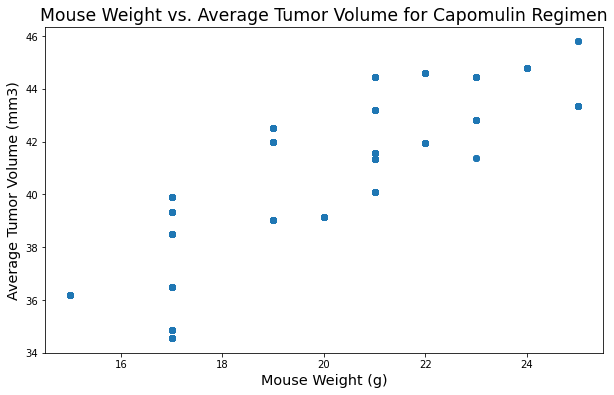

In [36]:
# define x and y values:
x_values=avg_tumor_df2["Weight"]
y_values=avg_tumor_df2["Mean Tumor Size (mm3)"]

plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values)
plt.xlabel("Mouse Weight (g)", fontsize="x-large")
plt.ylabel("Average Tumor Volume (mm3)", fontsize="x-large")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", fontsize="xx-large")

## Correlation and Regression

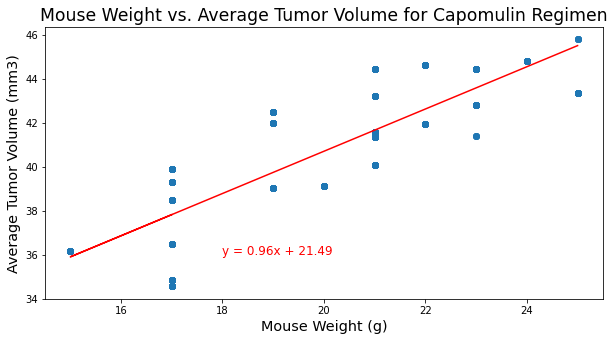

The r-squared is: 0.6962164535925288
The Correlation Coefficient is: 0.8343958614425964


<Figure size 432x288 with 0 Axes>

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# get regression module:
from scipy.stats import linregress

# get regression line equation
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# plot data and regression line
plt.figure(figsize=(10,5))

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(18,36),fontsize="large",color="red")

plt.xlabel("Mouse Weight (g)", fontsize="x-large")
plt.ylabel("Average Tumor Volume (mm3)", fontsize="x-large")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", fontsize="xx-large")

plt.show()
plt.tight_layout()
print(f"The r-squared is: {rvalue**2}")

correlation= st.pearsonr(x_values, y_values)
print(f'The Correlation Coefficient is: {correlation[0]}')
